In [1]:
import sys
import os
path_helper = ["c:\\","Users","vfriedrich","projects","gating","reproducibility_cleaned","helper"]
sys.path.append(os.path.join(*path_helper))
import helper_reproducibility as hr
import convexgating as cg
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sb
import os
import seaborn as sns
print(sys.executable)

C:\Users\vfriedrich\Anaconda3\envs\gating_env_local_parameter_option\python.exe


In [2]:
pre = 'experts01_summarize_scores'
start_time = hr.get_time()

In [3]:
path_input_data = hr.return_input_data_path() 
path_output_data = hr.return_output_data_path()
path_output_script = os.path.join(path_output_data,pre)
hr.make_path(os.path.join(path_output_script))

path exists


In [4]:
gating_dir = 'C:\\Users\\vfriedrich\\projects\\gating'

### level 1

In [5]:
samples = ['NL01','NL03','NL05','NL07','NL09']
clusters = ['cluster_B cell','cluster_Dendritic cell','cluster_Monocyte','cluster_NK cell','cluster_T cell']

In [6]:
overview_lvl1 = pd.DataFrame(columns =['sample','cluster','f1','recall','precision','hierarchy'])
for sample in samples:
    for cluster in clusters:
        perf_loc = os.path.join(gating_dir,
                     'Paper',
                     'Inkscape',
                     'Figure_3_experts',
                     'gd_drive_02_08',
                     'ConvexGating_results',
                     'cell_type_lvl_1',
                     'cell_type_lvl_1',
                     cluster + '_batch_' + sample,
                     cluster,'performance.csv')
        
        f1,recall,precision,hierarchy = hr.get_f1_hierarch(perf_loc)
        overview_lvl1 = overview_lvl1.append(pd.DataFrame([[sample,cluster,f1,recall,precision,hierarchy]],columns=['sample','cluster','f1','recall','precision','hierarchy']))
overview_lvl1['celltype'] = overview_lvl1['cluster'].str.replace('^cluster_', '', regex=True)
overview_lvl1.to_csv(os.path.join(path_output_script,'perf_overview_lvl1.csv'))

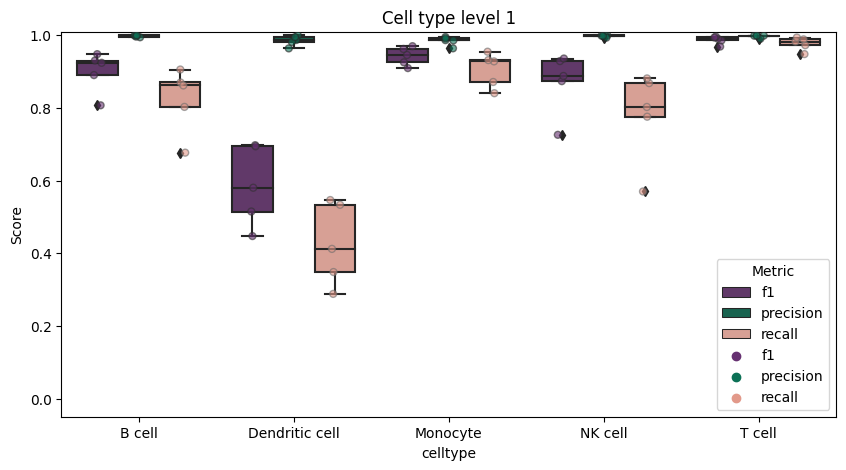

In [7]:
df_melted = overview_lvl1.melt(id_vars=['sample', 'celltype'], value_vars=['f1', 'precision', 'recall'],
                    var_name='Metric', value_name='Value')

# Create a barplot
fig = plt.figure(figsize=(10,5))
sns.boxplot(x='celltype', y='Value', hue='Metric', data=df_melted, palette=["#663171", "#0c7156", "#e2998a"])
sns.stripplot(data = df_melted, x='celltype', y='Value', 
                 hue='Metric',
               palette=["#663171", "#0c7156", "#e2998a"],
              #palette='tab20',
              size=5, dodge=True, linewidth=1, alpha=0.6)

# Customize the plot
plt.title('Cell type level 1')
plt.ylabel('Score')
#plt.xlabel('Cell type level 1')
plt.legend(title='Metric')
plt.ylim([-0.05, 1.01])
plt.savefig(os.path.join(path_output_script,pre + '_barplot_perf_lvl1.pdf'), bbox_inches='tight')
plt.savefig(os.path.join(path_output_script,pre + '_barplot_perf_lvl1.png'), bbox_inches='tight')
# Show the plot
plt.show()

### level 2

In [8]:
samples = ['NL01','NL03','NL05','NL07','NL09']


clusters = ['cluster_B cell',
            'cluster_T cell',
'cluster_CD4+ T cell',
'cluster_CD8+ T cell',
'cluster_NK T cell',
'cluster_NK cell',
'cluster_Classical monocyte',
'cluster_Intermediate monocyte',
'cluster_Non-classical monocyte',
'cluster_pre-DC',
'cluster_cDC',
'cluster_pDC']

In [9]:
overview_lvl2 = pd.DataFrame(columns =['sample','cluster','f1','recall','precision','hierarchy'])
for sample in samples:
    for cluster in clusters:
        perf_loc = os.path.join(gating_dir,
                     'Paper',
                     'Inkscape',
                     'Figure_3_experts',
                     'gd_drive_02_08',
                     'ConvexGating_results',
                     'cell_type_lvl_2',
                     cluster + '_batch_' + sample,
                     cluster,'performance.csv')
        
        f1,recall,precision,hierarchy = hr.get_f1_hierarch(perf_loc)
        overview_lvl2 = overview_lvl2.append(pd.DataFrame([[sample,cluster,f1,recall,precision,hierarchy]],columns=['sample','cluster','f1','recall','precision','hierarchy']))
overview_lvl2['celltype'] = overview_lvl2['cluster'].str.replace('^cluster_', '', regex=True)
overview_lvl2.to_csv(os.path.join(path_output_script,'perf_overview_lvl2.csv'))

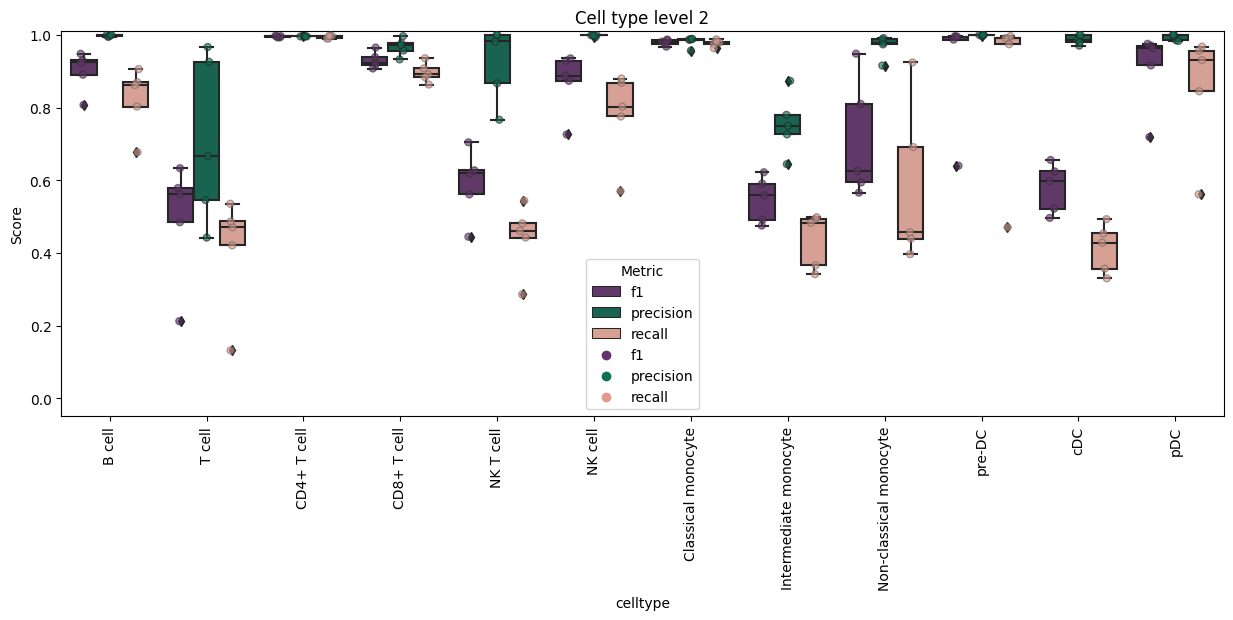

In [10]:
df_melted = overview_lvl2.melt(id_vars=['sample', 'celltype'], value_vars=['f1', 'precision', 'recall'],
                    var_name='Metric', value_name='Value')

# Create a barplot
fig = plt.figure(figsize=(15,5))
sns.boxplot(x='celltype', y='Value', hue='Metric', data=df_melted, palette=["#663171", "#0c7156", "#e2998a"])
sns.stripplot(data = df_melted, x='celltype', y='Value', 
                 hue='Metric',
               palette=["#663171", "#0c7156", "#e2998a"],
              #palette='tab20',
              size=5, dodge=True, linewidth=1, alpha=0.6)

# Customize the plot
plt.title('Cell type level 2')
plt.ylabel('Score')
#plt.xlabel('Cell type level 1')
plt.legend(title='Metric')
plt.ylim([-0.05, 1.01])
plt.xticks(rotation=90)
plt.savefig(os.path.join(path_output_script,pre + '_barplot_perf_lvl2.pdf'), bbox_inches='tight')
plt.savefig(os.path.join(path_output_script,pre + '_barplot_perf_lvl2.png'), bbox_inches='tight')


plt.show()

In [11]:
### Save session

In [12]:
hr.save_package_versions(hr.return_base_package_version_path(),pre = pre,do_print = True)
sc.logging.print_versions()
end_time = hr.get_time()
hr.get_time_delta(start_time,end_time,pre=pre,save=True)

babel==2.13.1
qtpy==2.4.1
sqlalchemy==2.0.23
send2trash==1.8.2
anyio==4.1.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
arrow==1.3.0
asttokens==2.4.1
async-lru==2.0.4
attrs==23.1.0
beautifulsoup4==4.12.2
bleach==6.1.0
certifi==2023.11.17
cffi==1.16.0
charset-normalizer==3.3.2
colorama==0.4.6
comm==0.2.0
debugpy==1.8.0
decorator==5.1.1
defusedxml==0.7.1
exceptiongroup==1.2.0
executing==2.0.1
fastjsonschema==2.19.0
fqdn==1.5.1
greenlet==3.0.1
idna==3.6
importlib-metadata==7.0.0
ipykernel==6.27.1
ipython==8.18.1
ipython-genutils==0.2.0
ipython-sql==0.5.0
ipywidgets==8.1.1
isoduration==20.11.0
jedi==0.19.1
json5==0.9.14
jsonpointer==2.4
jsonschema==4.20.0
jsonschema-specifications==2023.11.2
jupyter==1.0.0
jupyter-client==8.6.0
jupyter-console==6.6.3
jupyter-core==5.5.0
jupyter-events==0.9.0
jupyter-lsp==2.2.1
jupyter-server==2.11.2
jupyter-server-terminals==0.4.4
jupyterlab==4.0.9
jupyterlab-pygments==0.3.0
jupyterlab-server==2.25.2
jupyterlab-widgets==3.0.9
matplotlib-inline==0.1.6


datetime.timedelta(seconds=10, microseconds=198663)